In [67]:
import pandas as pd
import numpy as np
import re

In [ ]:
from sklearn.preprocessing import OneHotEncoder

## Problem Statement

We're going to try to predict something about tiktok users from a dataset of the top 250 users.

Because our dataset is small, we're going to use cross validation to identify the best combination of parameters for each model.

## Read in data from GitHub

In [69]:
tiktok_path = "https://raw.githubusercontent.com/datares/TikTok_Famous/main/Datasets/Top%20Tiktokers%20Data%20Collection/top-250-tiktokers.csv"
tiktok_raw = pd.read_csv(tiktok_path)

In [78]:
tiktok_raw
# tiktok = tiktok_raw.copy()

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,@ramneeksingh1313,India,8.6m,479.1k,31.6k,6.70%,0,Male,35.0,South Asian,0.0,"Comedy, Acting",0.0
252,253,@amandacerny,U.S.A,8.6m,654.7k,95.2k,14.60%,0,Female,29.0,White,1.0,"Comedy, Lifestyle",0.0
253,254,@rahimabram,Russia,8.6m,1.6m,271.2k,17%,0,Male,22.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0
254,255,@johnnyorlando,U.S.A,8.6m,1.1m,245.4k,22.70%,0,Male,17.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0


In [144]:
genres = tiktok_raw.Genre.str.split(', ').to_list()
unique_genres = list(set([item.strip() for sublist in genres if sublist is not np.nan for item in sublist]))

In [146]:
for genre in unique_genres:
    tiktok[genre] = tiktok_raw.Genre.fillna('').str.contains(genre)

<AxesSubplot:>

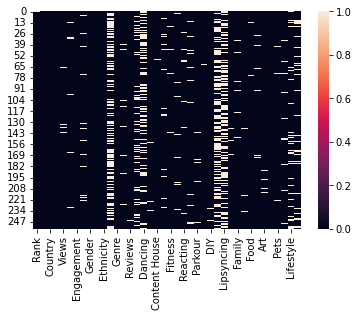

In [149]:
import seaborn as sns
sns.heatmap(tiktok == True)

## Data Cleaning

In [71]:
match = '\d*[.]?\d*'

tiktok['Followers'] = tiktok_raw['Followers'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Views'] = tiktok_raw['Views'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Likes'] = tiktok_raw['Likes'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Engagement'] = tiktok_raw['Engagement'].apply(lambda x: float(re.findall('\d*[.]?\d*', x)[0]))

## Data Exploration

In [60]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           256 non-null    int64  
 1   Username       256 non-null    object 
 2   Country        256 non-null    object 
 3   Followers      256 non-null    float64
 4   Views          256 non-null    float64
 5   Likes          256 non-null    float64
 6   Engagement     256 non-null    float64
 7   Brand Account  256 non-null    int64  
 8   Gender         232 non-null    object 
 9   Age            225 non-null    float64
 10  Ethnicity      242 non-null    object 
 11  Famous         255 non-null    float64
 12  Genre          254 non-null    object 
 13  LGBTQ          239 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 28.1+ KB


## Model Fitting

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# def print_metrics(model, X_train, X_test, y_train, y_test):
# #      training and testing accuracy, F1 score, and AUC
#     y_train_hat = model.predict(X_train)
#     y_test_hat = model.predict(X_test)
    
#     train_accuracy = metrics.accuracy_score(y_train, y_train_hat)
#     test_accuracy = metrics.accuracy_score(y_test, y_test_hat)
#     f1_score = metrics.f1_score(y_test, y_test_hat)
#     auc_score = metrics.roc_auc_score(y_test, y_test_hat)
    
#     print("\ttrain accuracy: ", train_accuracy)
#     print("\ttest accuracy:", test_accuracy)
#     print("\tf1 score:", str(f1_score))
#     print("\tAUC", auc_score)

def fit_models(data):

    models = {}
    
    regressors = {}
    
    for model, parameters in models.items():
        pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore')),
                         ('scaler', StandardScaler(with_mean=False)), 
                         ('model', model(**parameters))])
        
        cv = GridSearchCV(pipe, parameters)
        name = model.__name__
        regressors[name] = cv.fit(X_train, y_train)
        print(name, "(" + ", ".join(f'{k}: {v}' for k,v in model.items()) + ")")
#         print_metrics(classifiers[name], X_train, X_test, y_train, y_test)
    return classifiers

## Metrics/Evaluation

In [74]:
from sklearn.linear_model import LinearRegression

In [77]:
pipe  = Pipeline([model, LinearRegression()])
parameters
GridSearchCV(model, GridSearchCv)

SyntaxError: invalid syntax (4178803686.py, line 1)